# Week 6: Colab Experiment

# I. Introduction
In this exercise, we apply dimension reduction methods and clustering algorithms to single-cell sequencing data.

# II. Methods

### Data Loading and Preparation
The study begins by mounting Google Drive to access the dataset containing single-cell sequencing counts. The dataset is loaded using NumPy, and the cell counts are normalized by total counts. This involves calculating Counts Per Million (CPM) and applying a log transformation to the normalized counts.

### Principal Component Analysis (PCA)
PCA is performed to reduce the dimensionality of the log-transformed data. The analysis is configured to extract two principal components, which capture the most variance in the data.

### K-Means Clustering
A range of cluster numbers (k) from 2 to 10 is defined to assess the optimal number of clusters using K-Means clustering. For each value of k, K-Means is initialized and fitted to the PCA-transformed data. Cluster labels are predicted for each sample. The silhouette score, which measures the quality of the clustering, is computed and stored for each k value.

### Visualization
A scatter plot of the PCA results is created, displaying the first two principal components. The plot includes a title indicating the percentage of variance explained by the components and is color-coded according to predefined cluster colors. A line plot is generated to illustrate the relationship between the number of clusters and the corresponding silhouette scores, helping to identify the optimal number of clusters for K-Means.


In [1]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Load the data and normalize the single-cell sequencing counts by total counts and log transform the counts
tasic2018 = np.load("/content/drive/My Drive/week6_colab/cell_data.npz") # Note that you need to change the path to your own

# data normalization
librarySizes = tasic2018['counts'].sum(axis=1)
CPM = tasic2018['counts'] / librarySizes.reshape(-1,1) * 1e+6
logCPM = np.log2(CPM + 1)

In [3]:
# TODO
# Implement PCA
# Note that storing your result in X or change the plt.scatter
# X = PCA_RESULT


pca = PCA(n_components=2)  # Reduce to 2 dimensions
X = pca.fit_transform(logCPM)  # Store PCA result in X





In [4]:
# TODO
# Implement K-Means

k_grid = range(2,11,1)
score = []
for k in k_grid:
    # Initialize and fit K-Means
    kmeans = KMeans(n_clusters=k, random_state=42)  # Set random_state for reproducibility
    labels = kmeans.fit_predict(X)  # Fit and predict cluster labels

    # Calculate silhouette score
    silhouette_avg = silhouette_score(X, labels)
    score.append(silhouette_avg)  # Store silhouette score






## III. Results

Here we show the scatter plot of the top 2 PCs. We also show the silhouette score with respect to the number of k-means clusters.

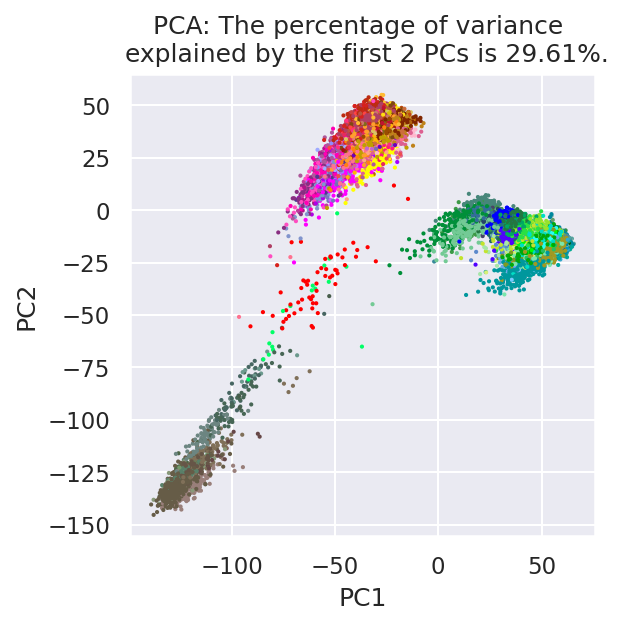

In [5]:
# Principal component analysis scatter plot
plt.figure(figsize=(4,4), dpi=150)
plt.scatter(X[:,0], X[:,1], s=1, color=tasic2018['clusterColors'][tasic2018['clusters']]) # Note that X is what you defined in PCA
plt.title(f"PCA: The percentage of variance \n explained by the first 2 PCs is {round(sum(pca.explained_variance_ratio_) * 100 , 2)}%.")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

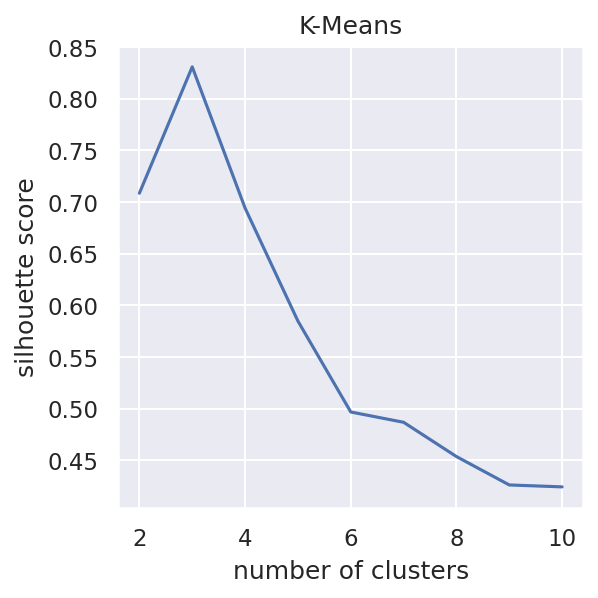

In [6]:
# k-means clustering performance
plt.figure(figsize=(4,4), dpi=150)
plt.plot(k_grid, score)
plt.title('K-Means')
plt.xlabel('number of clusters')
plt.ylabel('silhouette score')
plt.show()

# IV. Conclusion and Discussion

### Conclusion:


The Principal Component Analysis (PCA) graph demonstrates that the first two principal components (PC1 and PC2) capture approximately 29.61% of the variance. This indicates that PCA has successfully reduced the dimensionality of the data while preserving meaningful patterns, suggesting the presence of two or more distinct clusters.

Different solvers for PCA, such as 'auto', 'full', 'arpack', and 'randomized', were tested to optimize the result, but none improved the variance explained by the first two PCs, which remained at 29.61%. This suggests that changing the solver does not significantly impact the performance in this case.

The trend analysis focuses on the silhouette score across various cluster counts using K-Means clustering. The silhouette score measures how well-defined clusters are, with higher values indicating clearer boundaries between clusters. The results show that using 2 or 3 clusters yields the best clustering solution, with the highest silhouette score occurring at 3 clusters. Adding more clusters beyond this point reduces the silhouette score, indicating poorer clustering quality and the risk of overfitting.

**Summary:**

PCA reveals distinct clusters in the dataset, which are further refined using K-Means clustering. Based on the silhouette score, the data appears to be best grouped into 2 or 3 clusters. However, increasing the number of clusters diminishes the clustering quality.

**Standardization Test:**

I applied standardization to PCA using the StandardScaler to observe its effects. After standardization, the data became more centralized, improving computational efficiency, but it did not enhance the model's performance. Standardization scales the data to have a variance of 1, which only changes the scale of the data without substantially affecting the clustering performance or model accuracy. Interestingly, standardization reduced the percentage of variance explained by the first two principal components from 29.61% to 16%. This reflects a shift in how the data is represented after scaling, rather than a change in the underlying patterns or model accuracy. In summary, standardization balanced the variance among features, which weakened the explanatory power of the first few principal components, thus lowering the percentage of variance captured by the first two PCs. However, this does not imply an improvement in the model’s performance, as standardization only modifies the data's representation without altering its inherent structure or patterns.

### Discussion:
Principal Component Analysis (PCA) is a powerful dimensionality reduction technique that aids in visualizing and preprocessing high-dimensional data. However, it can result in the loss of some information during the transformation process. Despite this, PCA is highly valuable for uncovering the underlying structure of complex datasets.

K-Means clustering is a straightforward and efficient algorithm for grouping data into clusters. However, it requires careful consideration regarding the selection of the number of clusters. Additionally, K-Means is sensitive to initialization and can be influenced by outliers, which may affect the robustness of the clustering results.

### Proposals for Next Steps:
1. **Evaluate Cluster Stability:**
   - Implement techniques to assess the stability of the clusters identified by K-Means. This can include running the algorithm multiple times with different random initializations to check for consistency in the resulting clusters.

2. **Parameter Tuning for K-Means:**
   - Explore methods for tuning the parameters of the K-Means algorithm, particularly the number of clusters. Employ techniques such as grid search or silhouette analysis to identify the optimal configuration that maximizes clustering performance.
